<a href="https://colab.research.google.com/github/ezenio01YT/PRA3024-notebook/blob/main/exercise_1_track_reconstruction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Solving track reconstruction
=======================

Up until now, we have created tracks. However, tracks should fulfill some criteria in order to make sense from a physical standpoint: It wouldn't make sense to have several tracks coming from the same hits, or to join random hits together.

Typically one uses known geometrical constraints alongside problem-specific knowledge in order to determine where to look for tracks, and how should tracks look like. Ultimately, there are five quantities one has to look after:


*   Reconstruction Efficiency: The fraction of particles we have reconstructed.
    > \# correctly reconstructed / \# real tracks

*   Clone Tracks: Tracks that are similar to other correctly reconstructed tracks.
    > \# clone tracks / \# correctly reconstructed

*   Fake Tracks: Tracks that are incorrect, either created by noise hits or by incorrectly reconstructing a track.
    > \# incorrectly reconstructed / \# all reconstructed

*   Hit purity: Fraction of hits in a track that belong to the same MC particle.
    > \# track hits in MC particle hits / \# track hits
    
*   Hit efficiency: Number of hits correctly found out of the MC particle hits in a track.
    > \# track hits in MC particle hits / \# MC particle hits

Phew, that was quite a mouthful. If you want one thing to look for at the beginning, that is to *maximize reconstruction efficiency*. First try to reconstruct as much correct as possible, and work out the other indicators one by one.

Alongside the velopix tracking project there are a few algorithms we can try:

In [ ]:
# Run this if you didn't run it previously
!git clone https://github.com/dcampora/velopix_tracking.git

Cloning into 'velopix_tracking'...
remote: Enumerating objects: 446, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 446 (delta 49), reused 47 (delta 47), pack-reused 393 (from 1)
Receiving objects: 100% (446/446), 7.46 MiB | 8.20 MiB/s, done.
Resolving deltas: 100% (215/215), done.


In [ ]:
import sys, os
sys.path.append(os.getcwd() + "/../")
sys.path.append(os.getcwd() + "/velopix_tracking/")

import json
from event_model import event_model as em

f = open("velopix_tracking/events/velo_event_0.json")
json_data = json.loads(f.read())
event = em.event(json_data)
f.close()

Track following is a technique that reconstructs hits by visiting neighbouring modules. One first creates tracklets or *seeds* and posteriorly follows those tracks until no more hits are found.

<img src="velopix_tracking/doc/reco_example.png" alt="Track follow example" />

Included with the project is a track following implementation. Let's check it out.

In [ ]:
from algorithms.track_following import track_following

# Instantiate track following
track_following = track_following()

# Solve the event
tracks = track_following.solve(event)

print("Found %i tracks with track following!" % len(tracks))

Instantiating track_following solver with parameters
 max slopes: (0.7, 0.7)
 max tolerance: (0.4, 0.4)
 max scatter: 0.4

Found 148 tracks with track following!


Track following found tracks, but are these the good tracks? For that, we will need to employ a validator:

In [ ]:
from validator import validator_lite as vl
vl.validate_print([json_data], [tracks])

148 tracks including        8 ghosts (  5.4%). Event average   5.4%
              velo :      126 from      134 ( 94.0%,  94.0%)        3 clones (  2.38%), purity: ( 98.83%,  98.83%),  hitEff: ( 93.89%,  93.89%)
              long :       22 from       22 (100.0%, 100.0%)        1 clones (  4.55%), purity: ( 99.52%,  99.52%),  hitEff: ( 93.80%,  93.80%)
         long>5GeV :        8 from        8 (100.0%, 100.0%)        0 clones (  0.00%), purity: (100.00%, 100.00%),  hitEff: (100.00%, 100.00%)


Results are shown for different track categories. Track categories are detector-specific, and refer to different types of tracks depending on the subdetectors they traverse, their energy, the particle decay where they originated from, direction, etc.

<img src="docs/track_types.png" alt="Track follow example" style="width: 600px" />

In the previous case, you can see some tracks are "velo" tracks or "long" tracks, which you can interpret from the image above.

Exercise 2
---------------

Let's first visualize what just happened.

* Use `print_event_2d` to print the event, and then print the event with the tracks found by `track_following`.

In [ ]:
from visual.base import print_event_2d
%matplotlib inline

* The statistics we have are insufficient. Load iteratively all 10 events and run `track_following` on them. Finally, run the validator once with all the `json` data and all tracks. Do the numbers correspond with the previous ones?

Instantiating track_following solver with parameters
 max slopes: (0.7, 0.7)
 max tolerance: (0.4, 0.4)
 max scatter: 0.4

Found 148 tracks with track following!
Event without tracks:


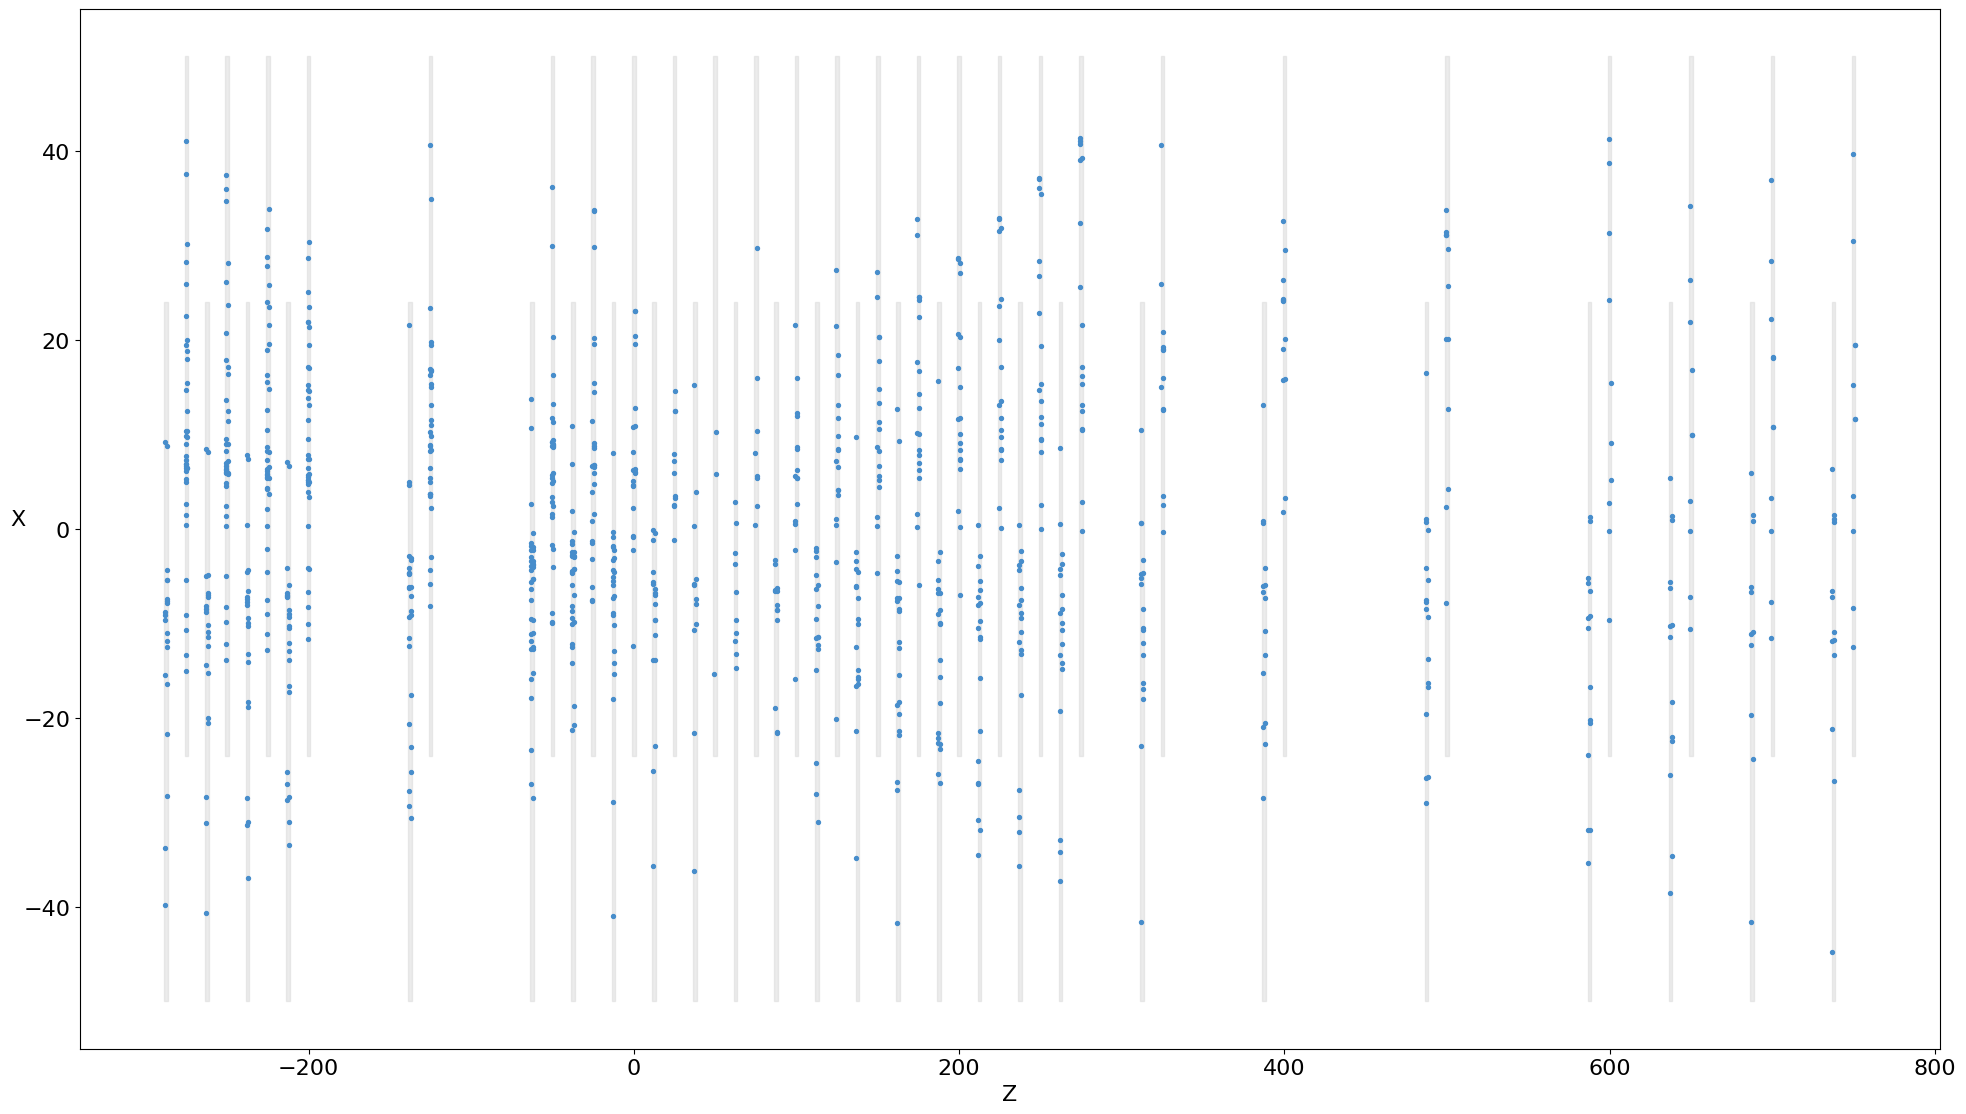


Event with reconstructed tracks:


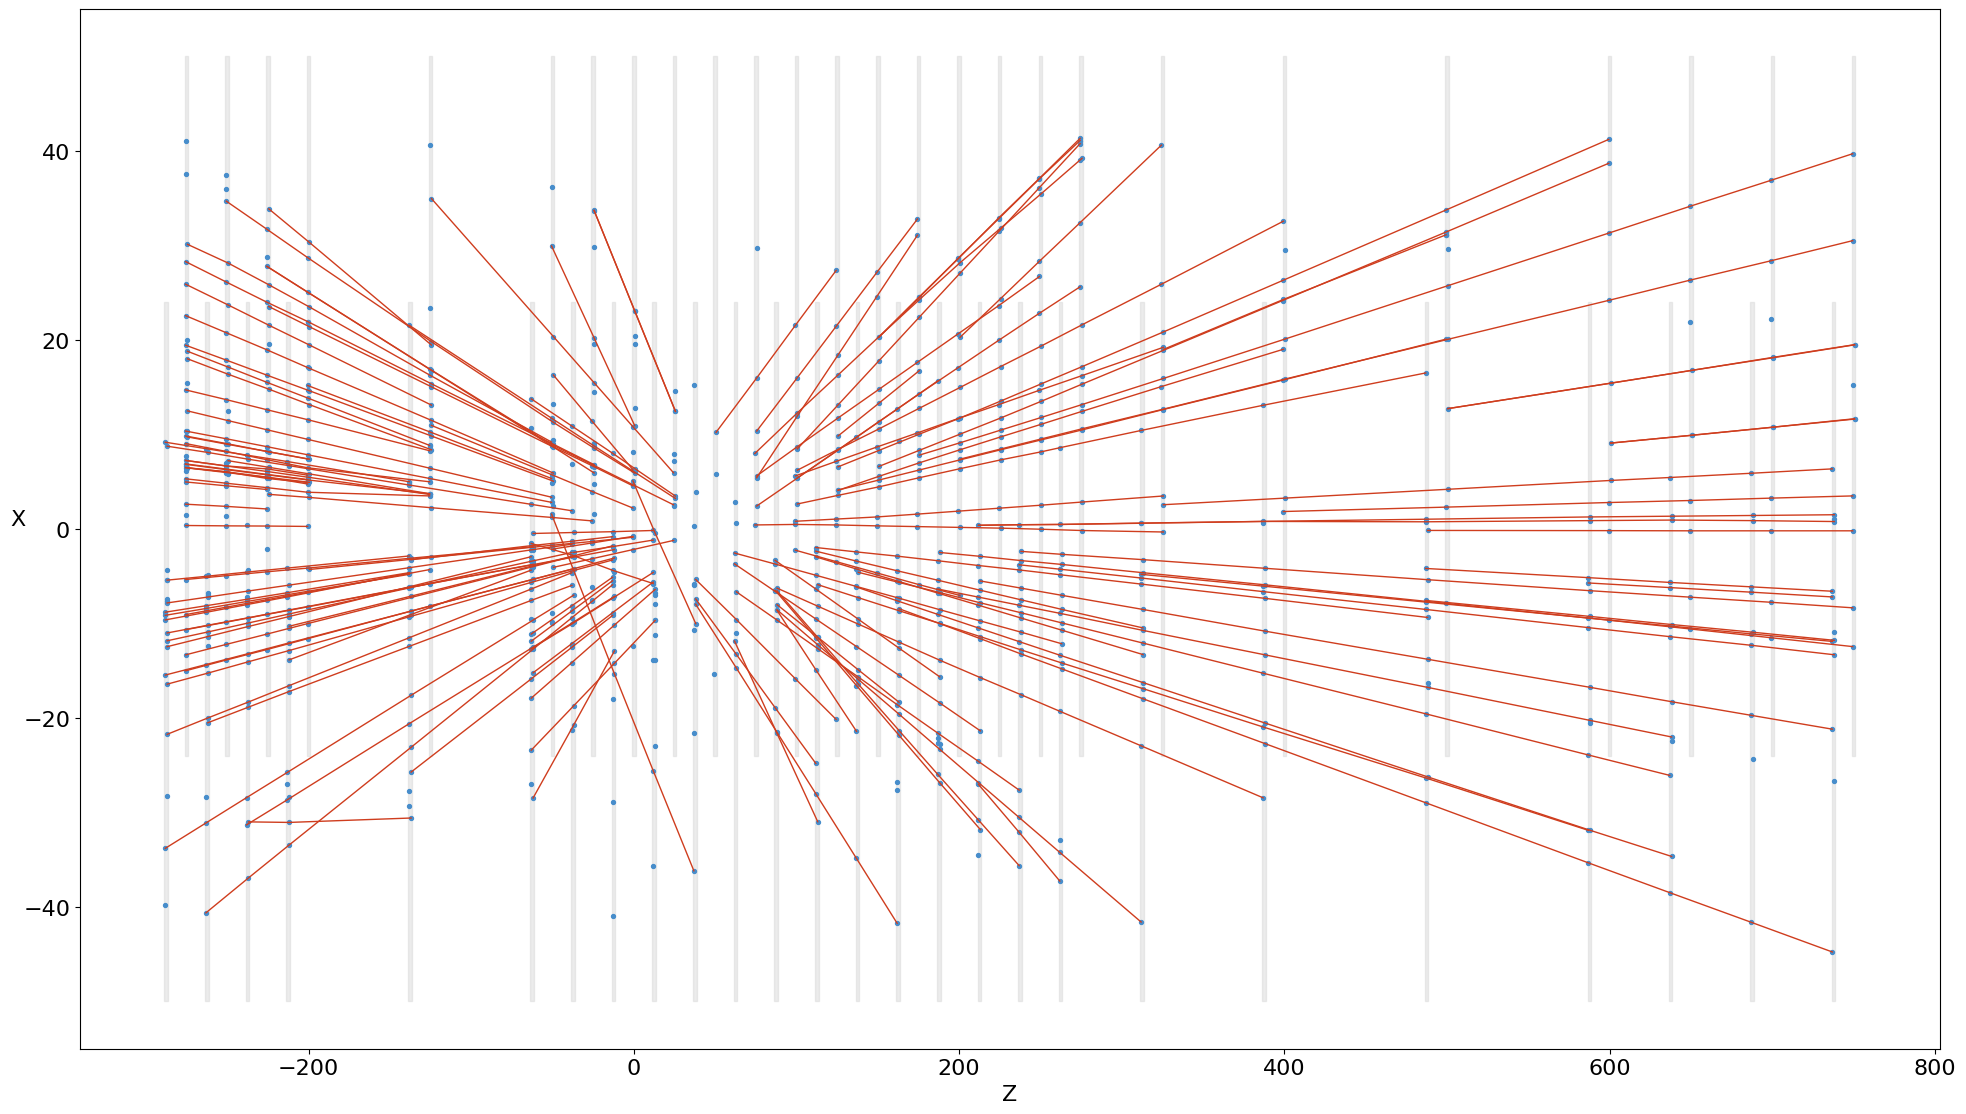

In [ ]:
# Import track following algorithm
from algorithms.track_following import track_following

# Create track following instance and solve
track_following_algo = track_following()
tracks = track_following_algo.solve(event)

print(f"Found {len(tracks)} tracks with track following!")

# Visualize the event without tracks
print("Event without tracks:")
print_event_2d(event)

# Visualize the event with tracks
print("\nEvent with reconstructed tracks:")
print_event_2d(event, tracks)

In [ ]:
# Import validator
from validator import validator_lite as vl

all_json_data = []
all_tracks = []
track_following_algo = track_following()

# Process all 10 events
for i in range(10):
    try:
        file_path = f"velopix_tracking/events/velo_event_{i}.json"
        with open(file_path) as f:
            json_data = json.loads(f.read())
            event = em.event(json_data)

            tracks = track_following_algo.solve(event)

            all_json_data.append(json_data)
            all_tracks.append(tracks)

            print(f"Event {i}: Found {len(tracks)} tracks")
    except FileNotFoundError:
        print(f"Event {i} file not found, skipping...")
        continue

# Validate all events
print("\nValidation results for all 10 events:")
vl.validate_print(all_json_data, all_tracks)

Instantiating track_following solver with parameters
 max slopes: (0.7, 0.7)
 max tolerance: (0.4, 0.4)
 max scatter: 0.4

Event 0: Found 148 tracks
Event 1: Found 345 tracks
Event 2: Found 13 tracks
Event 3: Found 459 tracks
Event 4: Found 302 tracks
Event 5: Found 446 tracks
Event 6: Found 387 tracks
Event 7: Found 128 tracks
Event 8: Found 96 tracks
Event 9: Found 435 tracks

Validation results for all 10 events:
2759 tracks including      273 ghosts (  9.9%). Event average   8.5%
              velo :     2181 from     2377 ( 91.8%,  93.0%)       52 clones (  2.38%), purity: ( 98.07%,  98.20%),  hitEff: ( 94.46%,  94.58%)
              long :      640 from      654 ( 97.9%,  98.5%)       27 clones (  4.22%), purity: ( 98.34%,  98.72%),  hitEff: ( 93.95%,  94.04%)
         long>5GeV :      391 from      401 ( 97.5%,  98.4%)       20 clones (  5.12%), purity: ( 98.10%,  98.68%),  hitEff: ( 94.25%,  93.20%)
      long_strange :       24 from       26 ( 92.3%,  93.7%)        0 clones ( 

The fake rate is a big higher than expected. It could be that some of the tracks with less hits are incorrect.

* Remove all tracks with 3 hits and run the validator. Do the results improve? What are the tradeoffs?

In [ ]:
# Filter out tracks with only 3 hits
filtered_tracks = []
for track_list in all_tracks:
    filtered = []
    for track in track_list:
        # Check if track has more than 3 hits
        if len(track.hits) > 3:
            filtered.append(track)
    filtered_tracks.append(filtered)

# Calculate some statistics
original_total = sum(len(tracks) for tracks in all_tracks)
filtered_total = sum(len(tracks) for tracks in filtered_tracks)

print(f"Original total tracks: {original_total}")
print(f"Filtered total tracks: {filtered_total}")
print(f"Removed {original_total - filtered_total} tracks with 3 or fewer hits")

# Validate with filtered tracks
print("\nValidation results after removing tracks with 3 hits:")
vl.validate_print(all_json_data, filtered_tracks)

Original total tracks: 2759
Filtered total tracks: 2288
Removed 471 tracks with 3 or fewer hits

Validation results after removing tracks with 3 hits:
2288 tracks including      121 ghosts (  5.3%). Event average   4.3%
              velo :     1914 from     2377 ( 80.5%,  81.7%)       40 clones (  2.09%), purity: ( 97.79%,  97.98%),  hitEff: ( 94.98%,  94.99%)
              long :      624 from      654 ( 95.4%,  96.8%)       24 clones (  3.85%), purity: ( 98.29%,  98.68%),  hitEff: ( 94.62%,  94.37%)
         long>5GeV :      387 from      401 ( 96.5%,  97.4%)       18 clones (  4.65%), purity: ( 98.07%,  98.66%),  hitEff: ( 95.06%,  93.64%)
      long_strange :       21 from       26 ( 80.8%,  78.0%)        0 clones (  0.00%), purity: ( 97.49%,  96.71%),  hitEff: ( 95.79%,  97.79%)
 long_strange>5GeV :        8 from       11 ( 72.7%,  67.7%)        0 clones (  0.00%), purity: ( 98.75%,  99.00%),  hitEff: ( 96.14%,  96.96%)
        long_fromb :        7 from        9 ( 77.8%,  78.9%)

Exercise 4
---------------

If you still have energy in you, with everything you have learned you have now the tools to attempt creating your own track reconstruction algorithm.

We will first need a function to determine whether a track looks good or bad. One such function is the *means squared error*:

* Create a means_squared_error method that gets a track as an input and calculates the MSE (https://en.wikipedia.org/wiki/Mean_squared_error) of a track.

In [ ]:
import numpy as np
from scipy import stats
from typing import List, Optional

def means_squared_error(track, projection: str = 'xz') -> float:
    """
    Calculate the Mean Squared Error (MSE) for a track by fitting a line
    to the hit positions and measuring the deviation.

    The MSE quantifies how well the hits follow a straight line trajectory.
    Lower MSE values indicate better linearity (better track quality).

    Parameters:
    -----------
    track : object
        Track object containing hits with x, y, z coordinates
    projection : str
        Which projection to use for fitting:
        - 'xz': fit in x-z plane (default)
        - 'yz': fit in y-z plane
        - 'both': average of x-z and y-z projections

    Returns:
    --------
    float
        Mean Squared Error value. Returns inf if:
        - Track has less than 3 hits
        - All hits have same z-coordinate (no variation)
        - Linear regression fails

    Notes:
    ------
    For a perfect straight line, MSE would be 0.
    Typical good tracks have MSE < 0.1 (depending on detector resolution)
    """

    # Check if track has enough hits
    if not hasattr(track, 'hits') or len(track.hits) < 3:
        return float('inf')

    # Extract coordinates from hits
    z_coords = []
    x_coords = []
    y_coords = []

    for hit in track.hits:
        # Try different possible attribute names
        if hasattr(hit, 'x') and hasattr(hit, 'y') and hasattr(hit, 'z'):
            x_coords.append(hit.x)
            y_coords.append(hit.y)
            z_coords.append(hit.z)
        elif hasattr(hit, 'global_x') and hasattr(hit, 'global_y') and hasattr(hit, 'global_z'):
            x_coords.append(hit.global_x)
            y_coords.append(hit.global_y)
            z_coords.append(hit.global_z)
        elif hasattr(hit, 'pos'):
            # If hit has a position array/vector
            x_coords.append(hit.pos[0])
            y_coords.append(hit.pos[1])
            z_coords.append(hit.pos[2])
        else:
            # Last resort: try to get coordinates from the module
            if hasattr(hit, 'module') and hasattr(hit.module, 'x') and hasattr(hit.module, 'y') and hasattr(hit.module, 'z'):
                x_coords.append(hit.module.x)
                y_coords.append(hit.module.y)
                z_coords.append(hit.module.z)
            else:
                # Can't extract coordinates
                return float('inf')

    # Convert to numpy arrays for easier calculations
    z = np.array(z_coords)
    x = np.array(x_coords)
    y = np.array(y_coords)

    # Check for valid data
    if len(z) < 3:
        return float('inf')

    # Check if all z-coordinates are the same (no variation for regression)
    if np.std(z) < 1e-10:
        return float('inf')

    try:
        if projection == 'xz':
            # Fit line in x-z plane: x = a*z + b
            slope, intercept, r_value, p_value, std_err = stats.linregress(z, x)
            predicted = slope * z + intercept
            residuals = x - predicted
            mse = np.mean(residuals ** 2)

        elif projection == 'yz':
            # Fit line in y-z plane: y = a*z + b
            slope, intercept, r_value, p_value, std_err = stats.linregress(z, y)
            predicted = slope * z + intercept
            residuals = y - predicted
            mse = np.mean(residuals ** 2)

        elif projection == 'both':
            # Calculate MSE for both projections and take average
            # x-z projection
            slope_x, intercept_x, _, _, _ = stats.linregress(z, x)
            predicted_x = slope_x * z + intercept_x
            residuals_x = x - predicted_x
            mse_x = np.mean(residuals_x ** 2)

            # y-z projection
            slope_y, intercept_y, _, _, _ = stats.linregress(z, y)
            predicted_y = slope_y * z + intercept_y
            residuals_y = y - predicted_y
            mse_y = np.mean(residuals_y ** 2)

            # Weighted average (could weight by number of hits or other factors)
            mse = (mse_x + mse_y) / 2.0

        elif projection == '3d':
            # Alternative: Fit 3D line and calculate distance to line
            # This is more complex but potentially more accurate
            # Center the points
            centroid = np.array([np.mean(x), np.mean(y), np.mean(z)])
            centered_x = x - centroid[0]
            centered_y = y - centroid[1]
            centered_z = z - centroid[2]

            # Create matrix of centered points
            A = np.column_stack([centered_x, centered_y, centered_z])

            # Perform PCA to find direction of maximum variance
            u, s, vh = np.linalg.svd(A)

            # Direction vector is first principal component
            direction = vh[0]

            # Calculate distances of points to the line
            # Line equation: P = centroid + t * direction
            # Distance = |(P - centroid) × direction| / |direction|
            # Since direction is unit vector from SVD, |direction| = 1

            # Vector from centroid to each point
            vectors = np.column_stack([centered_x, centered_y, centered_z])

            # Cross product with direction
            cross_prod = np.cross(vectors, direction)

            # Distance squared
            distances_sq = np.sum(cross_prod ** 2, axis=1)

            # MSE is mean of squared distances
            mse = np.mean(distances_sq)

        else:
            raise ValueError(f"Unknown projection: {projection}. Use 'xz', 'yz', 'both', or '3d'.")

        return float(mse)

    except Exception as e:
        # If any error occurs in fitting/calculation
        print(f"Warning: Error calculating MSE: {e}")
        return float('inf')


def track_quality_score(track, method: str = 'mse') -> float:
    """
    Calculate a quality score for a track.
    Higher score = better track.

    Parameters:
    -----------
    track : object
        Track object
    method : str
        Scoring method:
        - 'mse': Inverse of MSE (1/(1 + MSE))
        - 'r_squared': R² value from linear regression
        - 'composite': Combination of MSE and number of hits

    Returns:
    --------
    float
        Quality score between 0 and 1 (higher is better)
    """

    if method == 'mse':
        mse = means_squared_error(track, projection='both')
        if mse == float('inf'):
            return 0.0
        # Transform MSE to a score: 1/(1 + MSE)
        # For MSE=0 -> score=1, for MSE→∞ -> score→0
        return 1.0 / (1.0 + mse)

    elif method == 'r_squared':
        # Calculate R² value (coefficient of determination)
        if len(track.hits) < 2:
            return 0.0

        # Extract coordinates
        z_coords = []
        x_coords = []
        y_coords = []

        for hit in track.hits:
            if hasattr(hit, 'x') and hasattr(hit, 'y') and hasattr(hit, 'z'):
                x_coords.append(hit.x)
                y_coords.append(hit.y)
                z_coords.append(hit.z)

        z = np.array(z_coords)
        x = np.array(x_coords)
        y = np.array(y_coords)

        # Calculate R² for both projections
        try:
            # x-z projection
            slope_x, intercept_x, r_value_x, _, _ = stats.linregress(z, x)
            r2_x = r_value_x ** 2

            # y-z projection
            slope_y, intercept_y, r_value_y, _, _ = stats.linregress(z, y)
            r2_y = r_value_y ** 2

            # Average R²
            return (r2_x + r2_y) / 2.0
        except:
            return 0.0

    elif method == 'composite':
        # Composite score considering both MSE and number of hits
        mse = means_squared_error(track, projection='both')
        if mse == float('inf'):
            mse_score = 0.0
        else:
            mse_score = 1.0 / (1.0 + mse)

        # Score for number of hits (normalized to 0-1)
        # Assuming max expected hits is ~20
        hits_score = min(len(track.hits) / 20.0, 1.0)

        # Weighted combination (70% MSE, 30% hits)
        composite_score = 0.7 * mse_score + 0.3 * hits_score
        return composite_score


# Test the MSE function with some sample tracks
def test_mse_function():
    """Test the MSE calculation with the existing tracks"""

    # Create track following instance
    from algorithms.track_following import track_following
    track_following_algo = track_following()

    # Load an event
    import json
    from event_model import event_model as em

    with open('/content/velopix_tracking/events/velo_event_0.json') as f:
        json_data = json.loads(f.read())
        event = em.event(json_data)

    # Get tracks using track following
    tracks = track_following_algo.solve(event)

    print(f"Testing MSE calculation on {len(tracks)} tracks")
    print("=" * 80)
    print(f"{'Track #':<8} {'Hits':<6} {'MSE (xz)':<12} {'MSE (yz)':<12} {'MSE (both)':<12} {'Quality':<10}")
    print("-" * 80)

    for i, track in enumerate(tracks[:10]):  # Test first 10 tracks
        if len(track.hits) >= 3:
            mse_xz = means_squared_error(track, projection='xz')
            mse_yz = means_squared_error(track, projection='yz')
            mse_both = means_squared_error(track, projection='both')
            quality = track_quality_score(track, method='mse')

            print(f"{i:<8} {len(track.hits):<6} {mse_xz:<12.6f} {mse_yz:<12.6f} {mse_both:<12.6f} {quality:<10.4f}")
        else:
            print(f"{i:<8} {len(track.hits):<6} {'N/A':<12} {'N/A':<12} {'N/A':<12} {'N/A':<10}")

    print("=" * 80)

    # Analyze track quality distribution
    print("\nTrack Quality Analysis:")
    print("-" * 40)

    mse_values = []
    for track in tracks:
        if len(track.hits) >= 3:
            mse = means_squared_error(track, projection='both')
            if mse < float('inf'):
                mse_values.append(mse)

    if mse_values:
        mse_values = np.array(mse_values)
        print(f"Total tracks with valid MSE: {len(mse_values)}")
        print(f"Average MSE: {np.mean(mse_values):.6f}")
        print(f"Median MSE: {np.median(mse_values):.6f}")
        print(f"Min MSE: {np.min(mse_values):.6f}")
        print(f"Max MSE: {np.max(mse_values):.6f}")
        print(f"Std Dev MSE: {np.std(mse_values):.6f}")

        # Suggest a threshold based on distribution
        threshold_suggestion = np.percentile(mse_values, 75)  # 75th percentile
        print(f"\nSuggested MSE threshold (75th percentile): {threshold_suggestion:.6f}")
        print("Tracks with MSE below this are likely good quality.")

        # Count tracks below various thresholds
        thresholds = [0.001, 0.005, 0.01, 0.05, 0.1]
        print("\nTracks below various MSE thresholds:")
        for threshold in thresholds:
            count = np.sum(mse_values < threshold)
            percentage = (count / len(mse_values)) * 100
            print(f"  MSE < {threshold:.3f}: {count} tracks ({percentage:.1f}%)")


# Run the test
if __name__ == "__main__":
    print("Testing Mean Squared Error function...")
    test_mse_function()

Testing Mean Squared Error function...
Instantiating track_following solver with parameters
 max slopes: (0.7, 0.7)
 max tolerance: (0.4, 0.4)
 max scatter: 0.4

Testing MSE calculation on 148 tracks
Track #  Hits   MSE (xz)     MSE (yz)     MSE (both)   Quality   
--------------------------------------------------------------------------------
0        9      0.000858     0.000472     0.000665     0.9993    
1        6      0.000049     0.000087     0.000068     0.9999    
2        11     0.002242     0.000788     0.001515     0.9985    
3        5      0.000031     0.000218     0.000125     0.9999    
4        4      0.000052     0.000447     0.000250     0.9998    
5        4      0.000266     0.000520     0.000393     0.9996    
6        5      0.000025     0.000815     0.000420     0.9996    
7        5      0.000092     0.001521     0.000806     0.9992    
8        12     0.005345     0.002405     0.003875     0.9961    
9        11     0.000387     0.000055     0.000221     0.99

Now that you have a function to qualify how good a track is *you are in business*. A rough approximation at a tracking in the VELO is as follows:

1. Iterate over 3 modules until you find a *triplet* of hits whose MSE is under a threshold.
2. Extrapolate those hits to the remaining modules until you find no compatible hits with the MSE method in a module.

Implement such a tracking algorithm, and have fun playing around with the data!

Testing with simpler approach...
Processing 996 hits from 52 modules
Found 40 tracks

Validation results for simple algorithm:
40 tracks including       31 ghosts ( 77.5%). Event average  77.5%
              velo :        9 from      134 (  6.7%,   6.7%)        0 clones (  0.00%), purity: ( 97.22%,  97.22%),  hitEff: ( 60.37%,  60.37%)
              long :        1 from       22 (  4.5%,   4.5%)        0 clones (  0.00%), purity: ( 75.00%,  75.00%),  hitEff: ( 33.33%,  33.33%)
         long>5GeV :        1 from        8 ( 12.5%,  12.5%)        0 clones (  0.00%), purity: ( 75.00%,  75.00%),  hitEff: ( 33.33%,  33.33%)
Instantiating track_following solver with parameters
 max slopes: (0.7, 0.7)
 max tolerance: (0.4, 0.4)
 max scatter: 0.4


Validation results for track following:
148 tracks including        8 ghosts (  5.4%). Event average   5.4%
              velo :      126 from      134 ( 94.0%,  94.0%)        3 clones (  2.38%), purity: ( 98.83%,  98.83%),  hitEff: ( 93.89%,  93.89%

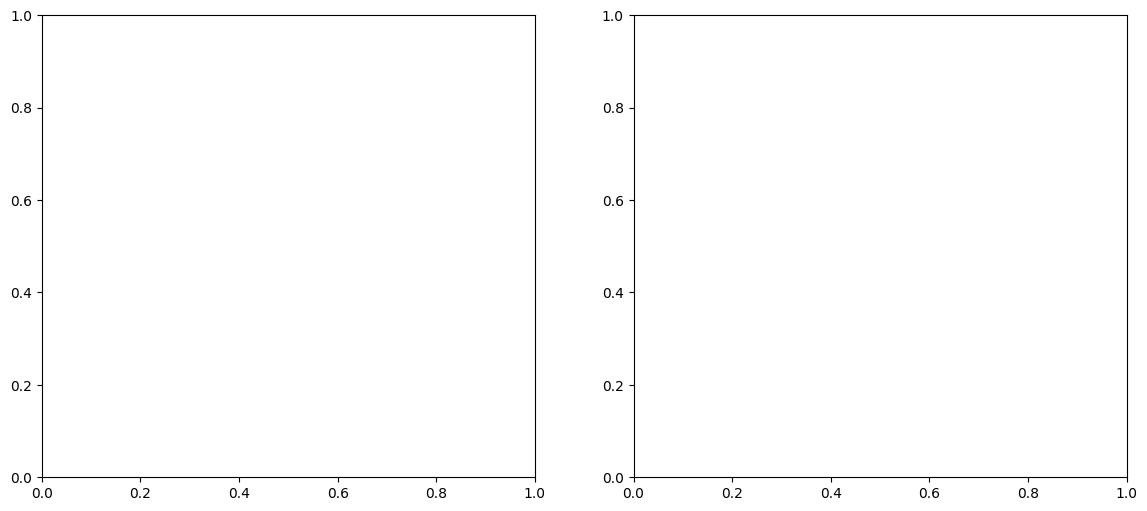

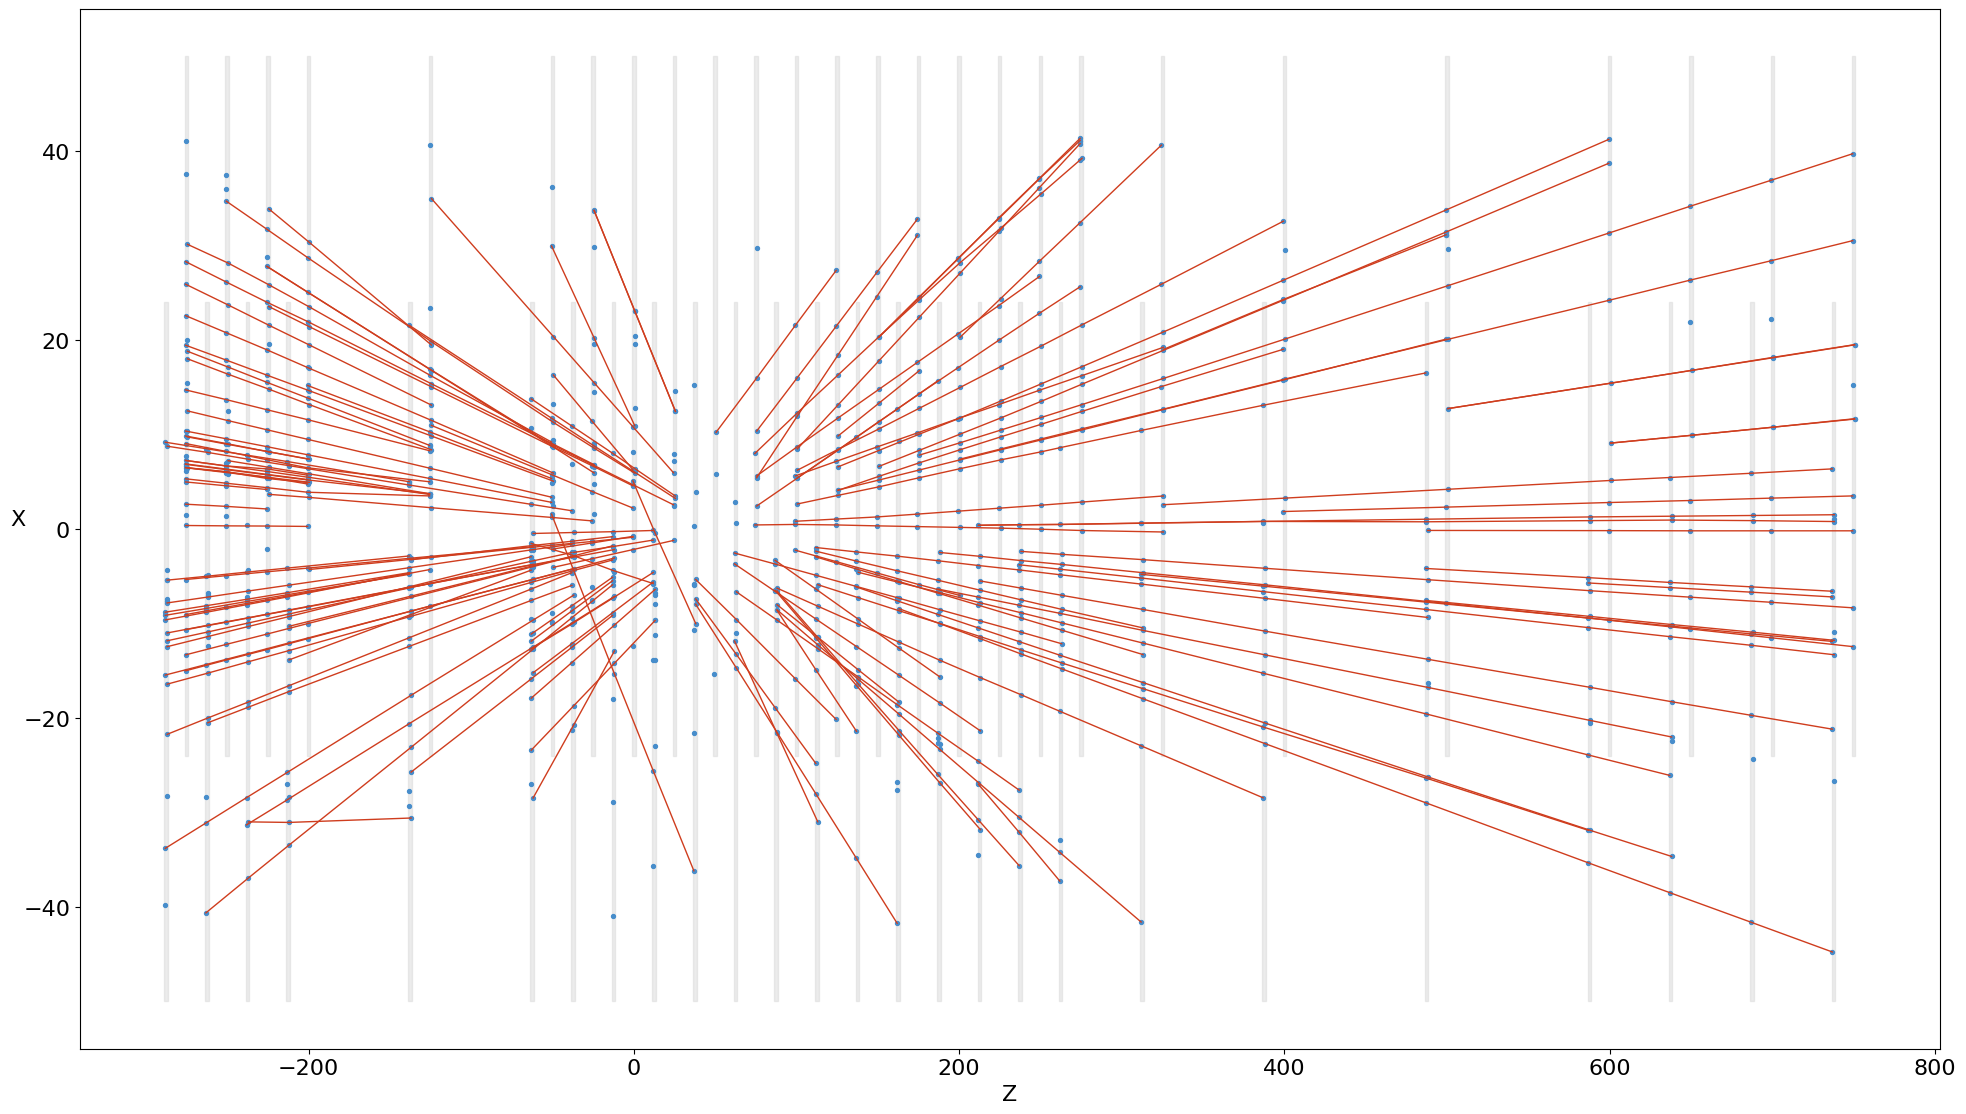

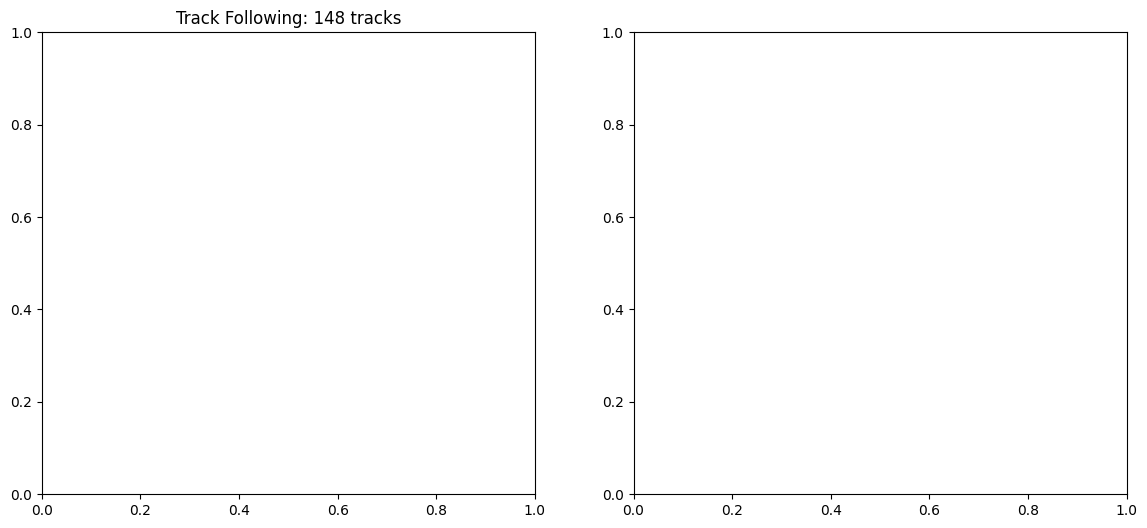

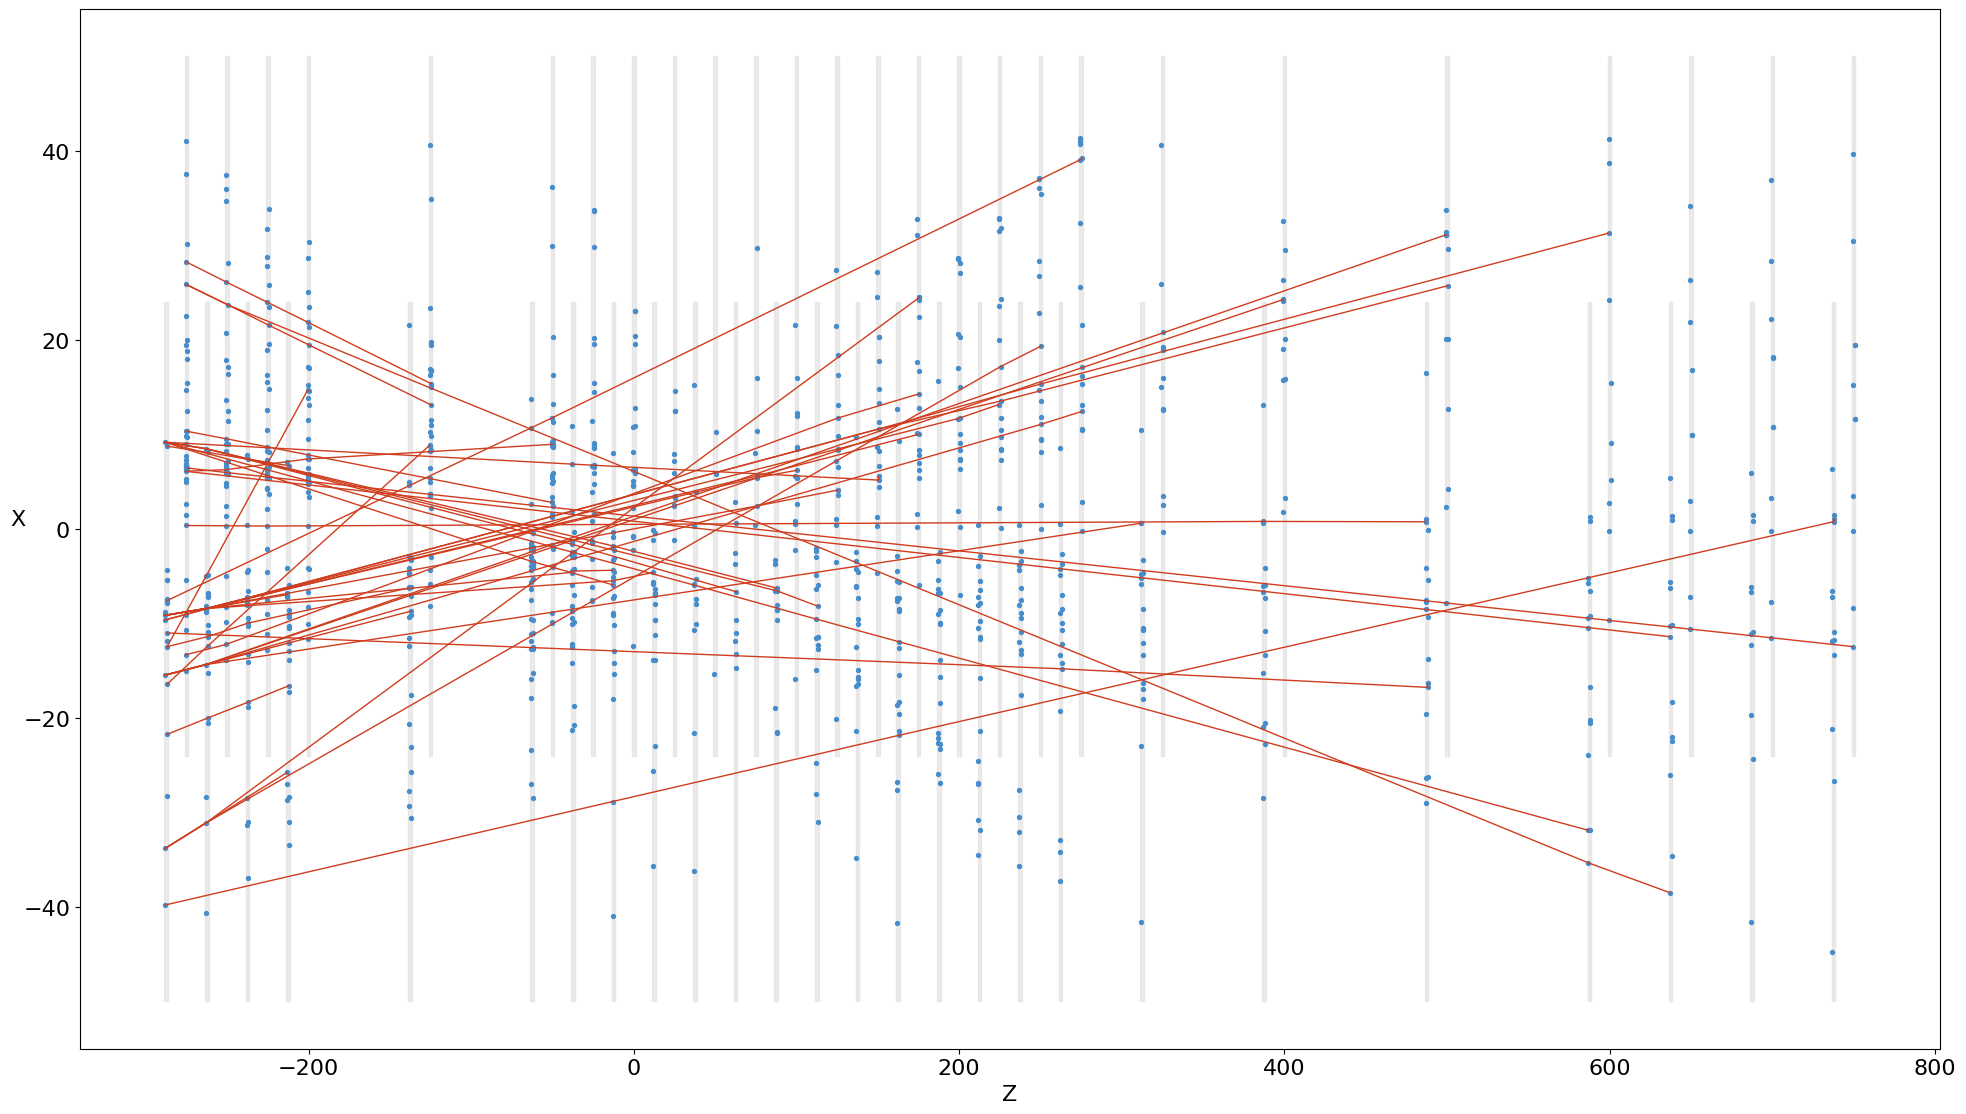

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
from typing import List, Set, Tuple, Optional, Dict
import heapq

class CustomTrackingAlgorithm:
    """
    Custom tracking algorithm for VELO detector reconstruction.
    Uses MSE-based triplet finding and extrapolation.
    """

    def __init__(self, mse_threshold: float = 0.01, min_hits: int = 4,
                 max_mse_growth: float = 1.5, require_different_modules: bool = True):
        """
        Initialize the tracking algorithm with parameters.

        Parameters:
        -----------
        mse_threshold : float
            Maximum MSE allowed for a triplet to be considered a valid seed
        min_hits : int
            Minimum number of hits required for a valid track
        max_mse_growth : float
            Maximum allowed MSE growth when adding new hits (multiplier)
        require_different_modules : bool
            Whether to require hits in different modules for triplets
        """
        self.mse_threshold = mse_threshold
        self.min_hits = min_hits
        self.max_mse_growth = max_mse_growth
        self.require_different_modules = require_different_modules

    def get_hit_module_id(self, hit) -> int:
        """Extract module ID from a hit."""
        # Try different ways to get module ID
        if hasattr(hit, 'module_id'):
            return hit.module_id
        elif hasattr(hit, 'module') and hasattr(hit.module, 'id'):
            return hit.module.id
        elif hasattr(hit, 'module'):
            # Use module index as ID
            return id(hit.module)
        elif hasattr(hit, 'detector') and hasattr(hit.detector, 'id'):
            return hit.detector.id
        else:
            # Try to get from event structure
            return -1

    def get_hit_coordinates(self, hit) -> Tuple[float, float, float]:
        """Extract coordinates from a hit."""
        # Try different possible attribute names
        if hasattr(hit, 'x') and hasattr(hit, 'y') and hasattr(hit, 'z'):
            return hit.x, hit.y, hit.z
        elif hasattr(hit, 'global_x') and hasattr(hit, 'global_y') and hasattr(hit, 'global_z'):
            return hit.global_x, hit.global_y, hit.global_z
        elif hasattr(hit, 'pos'):
            # If hit has a position array/vector
            pos = hit.pos
            if hasattr(pos, '__len__') and len(pos) >= 3:
                return pos[0], pos[1], pos[2]
        elif hasattr(hit, 'position'):
            pos = hit.position
            if hasattr(pos, '__len__') and len(pos) >= 3:
                return pos[0], pos[1], pos[2]
        elif hasattr(hit, 'r') and hasattr(hit, 'phi') and hasattr(hit, 'z'):
            # Cylindrical coordinates
            r = hit.r
            phi = hit.phi
            return r * np.cos(phi), r * np.sin(phi), hit.z

        # Try to get from module
        if hasattr(hit, 'module'):
            module = hit.module
            if hasattr(module, 'x') and hasattr(module, 'y') and hasattr(module, 'z'):
                return module.x, module.y, module.z

        # If we can't extract coordinates, raise an error
        raise ValueError(f"Cannot extract coordinates from hit: {type(hit)}")

    def get_module_z_position(self, module) -> float:
        """Get z-position of a module."""
        # Try to get z from module properties
        if hasattr(module, 'z'):
            return module.z
        elif hasattr(module, 'position'):
            pos = module.position
            if hasattr(pos, '__len__') and len(pos) >= 3:
                return pos[2]
        elif hasattr(module, 'global_z'):
            return module.global_z

        # If module has hits, use the first hit's z-coordinate
        if hasattr(module, 'hits'):
            # Check if hits is callable (method) or attribute
            if callable(module.hits):
                hits = module.hits()
            else:
                hits = module.hits

            if hits and len(hits) > 0:
                try:
                    x, y, z = self.get_hit_coordinates(hits[0])
                    return z
                except:
                    pass

        # Default fallback
        return 0.0

    def get_module_hits(self, module) -> List:
        """Get hits from a module, handling both attributes and methods."""
        if hasattr(module, 'hits'):
            if callable(module.hits):
                return module.hits()
            else:
                return module.hits
        else:
            return []

    def find_triplets(self, event, modules_to_check: Optional[List[int]] = None) -> List[List]:
        """
        Find all valid triplets in the event.

        A triplet is valid if:
        1. Hits are in different modules (if require_different_modules=True)
        2. MSE of the three hits is below threshold
        3. Hits are reasonably close in z (monotonically increasing/decreasing)
        """
        all_modules = event.modules
        if modules_to_check is not None:
            modules = [all_modules[i] for i in modules_to_check if i < len(all_modules)]
        else:
            modules = all_modules

        triplets = []
        n_modules = len(modules)

        # We need at least 3 modules to form a triplet
        if n_modules < 3:
            return triplets

        # Sort modules by z-position to ensure proper ordering
        modules_with_z = []
        for i, module in enumerate(modules):
            try:
                z = self.get_module_z_position(module)
                modules_with_z.append((i, z, module))
            except Exception as e:
                # Skip modules we can't process
                continue

        # Sort modules by z-coordinate
        modules_with_z.sort(key=lambda x: x[1])

        # Look for triplets in modules
        for i in range(len(modules_with_z) - 2):
            idx1, z1, module1 = modules_with_z[i]
            hits1 = self.get_module_hits(module1)

            if not hits1:
                continue

            for j in range(i + 1, len(modules_with_z) - 1):
                idx2, z2, module2 = modules_with_z[j]
                hits2 = self.get_module_hits(module2)

                if not hits2:
                    continue

                # Optional: skip if modules are too close/far in z
                if abs(z2 - z1) > 100:  # Max distance in mm
                    continue

                for k in range(j + 1, len(modules_with_z)):
                    idx3, z3, module3 = modules_with_z[k]
                    hits3 = self.get_module_hits(module3)

                    if not hits3:
                        continue

                    # Check all combinations of hits
                    for hit1 in hits1:
                        try:
                            x1, y1, z1_hit = self.get_hit_coordinates(hit1)
                        except ValueError:
                            continue

                        for hit2 in hits2:
                            try:
                                x2, y2, z2_hit = self.get_hit_coordinates(hit2)
                            except ValueError:
                                continue

                            # Quick check: hits should not be too far apart
                            dz = z2_hit - z1_hit
                            if abs(dz) < 1e-10:  # Avoid division by zero
                                continue

                            dx = x2 - x1
                            dy = y2 - y1

                            # Simple slope check (optional optimization)
                            slope_x = dx / dz
                            slope_y = dy / dz
                            if abs(slope_x) > 0.5 or abs(slope_y) > 0.5:  # Max slope
                                continue

                            for hit3 in hits3:
                                try:
                                    x3, y3, z3_hit = self.get_hit_coordinates(hit3)
                                except ValueError:
                                    continue

                                # Check if hits are in different modules (if required)
                                if self.require_different_modules:
                                    mod1_id = self.get_hit_module_id(hit1)
                                    mod2_id = self.get_hit_module_id(hit2)
                                    mod3_id = self.get_hit_module_id(hit3)

                                    if (mod1_id != -1 and mod2_id != -1 and mod3_id != -1 and
                                        (mod1_id == mod2_id or mod2_id == mod3_id or mod1_id == mod3_id)):
                                        continue

                                # Create temporary track
                                from event_model import event_model as em
                                temp_track = em.track([hit1, hit2, hit3])

                                # Check MSE
                                mse = means_squared_error(temp_track, projection='both')

                                if mse < self.mse_threshold:
                                    # Valid triplet found
                                    triplets.append({
                                        'hits': [hit1, hit2, hit3],
                                        'mse': mse,
                                        'modules': [idx1, idx2, idx3],
                                        'z_positions': [z1_hit, z2_hit, z3_hit]
                                    })

        # Sort triplets by MSE (best first)
        triplets.sort(key=lambda x: x['mse'])
        return triplets

    def extrapolate_track(self, seed_track, event, used_hits: Set) -> List:
        """
        Extrapolate a track from a seed (triplet) to other modules.

        Steps:
        1. Start with seed track (3 hits)
        2. Look for compatible hits in next modules
        3. Continue until no compatible hits found
        4. Optionally, also look backward
        """
        from event_model import event_model as em

        # Get current track hits and MSE
        current_hits = seed_track.hits.copy()
        current_mse = means_squared_error(seed_track, projection='both')

        if current_mse == float('inf'):
            return current_hits

        # Get all modules
        all_modules = event.modules

        # Create a list of modules with their z-positions and hits
        modules_with_info = []
        for idx, module in enumerate(all_modules):
            try:
                z = self.get_module_z_position(module)
                hits = self.get_module_hits(module)
                modules_with_info.append({
                    'idx': idx,
                    'z': z,
                    'module': module,
                    'hits': hits
                })
            except:
                continue

        # Sort modules by z
        modules_with_info.sort(key=lambda x: x['z'])

        # Find which modules our current hits are in
        current_module_indices = set()
        for hit in current_hits:
            for module_info in modules_with_info:
                if hit in module_info['hits']:
                    current_module_indices.add(module_info['idx'])
                    break

        if not current_module_indices:
            return current_hits

        # Forward extrapolation
        max_z = max([self.get_hit_coordinates(hit)[2] for hit in current_hits])

        for module_info in modules_with_info:
            # Skip modules we already have hits from or modules behind us
            if module_info['idx'] in current_module_indices or module_info['z'] < max_z - 10:
                continue

            # Skip modules without hits
            if not module_info['hits']:
                continue

            # Find best compatible hit in this module
            best_hit = None
            best_mse = float('inf')

            for hit in module_info['hits']:
                if id(hit) in used_hits:
                    continue

                try:
                    # Test adding this hit
                    test_hits = current_hits + [hit]
                    test_track = em.track(test_hits)
                    test_mse = means_squared_error(test_track, projection='both')

                    # Check if hit is compatible
                    if test_mse < current_mse * self.max_mse_growth and test_mse < self.mse_threshold * 2:
                        if test_mse < best_mse:
                            best_mse = test_mse
                            best_hit = hit
                except:
                    continue

            if best_hit:
                # Add the hit to the track
                current_hits.append(best_hit)
                used_hits.add(id(best_hit))
                current_mse = best_mse

        # Backward extrapolation
        min_z = min([self.get_hit_coordinates(hit)[2] for hit in current_hits])

        for module_info in reversed(modules_with_info):
            # Skip modules we already have hits from or modules in front of us
            if module_info['idx'] in current_module_indices or module_info['z'] > min_z + 10:
                continue

            if not module_info['hits']:
                continue

            # Find best compatible hit in this module
            best_hit = None
            best_mse = float('inf')

            for hit in module_info['hits']:
                if id(hit) in used_hits:
                    continue

                try:
                    # Test adding this hit at the beginning
                    test_hits = [hit] + current_hits
                    test_track = em.track(test_hits)
                    test_mse = means_squared_error(test_track, projection='both')

                    if test_mse < current_mse * self.max_mse_growth and test_mse < self.mse_threshold * 2:
                        if test_mse < best_mse:
                            best_mse = test_mse
                            best_hit = hit
                except:
                    continue

            if best_hit:
                # Add the hit to the beginning of the track
                current_hits.insert(0, best_hit)
                used_hits.add(id(best_hit))
                current_mse = best_mse

        return current_hits

    def solve(self, event):
        """
        Main solving function for the tracking algorithm.

        Steps:
        1. Find all valid triplets
        2. Extrapolate each triplet to full tracks
        3. Remove duplicate/overlapping tracks
        4. Return the best tracks
        """
        from event_model import event_model as em

        # Find all valid triplets
        triplets = self.find_triplets(event)
        print(f"Found {len(triplets)} potential triplets")

        # Sort triplets by MSE (best quality first)
        triplets.sort(key=lambda x: x['mse'])

        # Track reconstruction
        tracks = []
        used_hits = set()

        # Process triplets in order of quality
        for i, triplet in enumerate(triplets[:50]):  # Limit to best 50 triplets
            # Skip if any hit already used
            hit_ids = [id(hit) for hit in triplet['hits']]
            if any(hid in used_hits for hid in hit_ids):
                continue

            # Create seed track
            seed_track = em.track(triplet['hits'])

            # Extrapolate to full track
            track_hits = self.extrapolate_track(seed_track, event, used_hits)

            # Check if track meets minimum requirements
            if len(track_hits) >= self.min_hits:
                final_track = em.track(track_hits)
                mse = means_squared_error(final_track, projection='both')

                # Only keep good quality tracks
                if mse < self.mse_threshold * 3:  # Slightly relaxed threshold for full tracks
                    tracks.append(final_track)

                    # Mark all hits as used
                    for hit in track_hits:
                        used_hits.add(id(hit))

                    print(f"  Triplet {i}: MSE={triplet['mse']:.4f} -> Track with {len(track_hits)} hits, MSE={mse:.4f}")

        print(f"\nReconstructed {len(tracks)} tracks")
        return tracks

    def solve_simple(self, event):
        """
        Simplified version of the algorithm that's more robust.
        """
        from event_model import event_model as em

        # Collect all hits with their coordinates
        all_hits_info = []
        for module_idx, module in enumerate(event.modules):
            hits = self.get_module_hits(module)
            for hit in hits:
                try:
                    x, y, z = self.get_hit_coordinates(hit)
                    all_hits_info.append({
                        'hit': hit,
                        'x': x,
                        'y': y,
                        'z': z,
                        'module_idx': module_idx,
                        'id': id(hit)
                    })
                except ValueError:
                    continue

        # Sort hits by z-coordinate
        all_hits_info.sort(key=lambda h: h['z'])

        tracks = []
        used_hits = set()
        n_hits = len(all_hits_info)

        print(f"Processing {n_hits} hits from {len(event.modules)} modules")

        # Look for triplets
        for i in range(n_hits - 2):
            hit1_info = all_hits_info[i]
            if hit1_info['id'] in used_hits:
                continue

            for j in range(i + 1, n_hits - 1):
                hit2_info = all_hits_info[j]
                if hit2_info['id'] in used_hits:
                    continue

                # Check module separation
                if self.require_different_modules and hit1_info['module_idx'] == hit2_info['module_idx']:
                    continue

                for k in range(j + 1, n_hits):
                    hit3_info = all_hits_info[k]
                    if hit3_info['id'] in used_hits:
                        continue

                    # Check module separation
                    if (self.require_different_modules and
                        (hit1_info['module_idx'] == hit3_info['module_idx'] or
                         hit2_info['module_idx'] == hit3_info['module_idx'])):
                        continue

                    # Create and test triplet
                    seed_track = em.track([hit1_info['hit'], hit2_info['hit'], hit3_info['hit']])
                    mse = means_squared_error(seed_track, projection='both')

                    if mse < self.mse_threshold:
                        # Found valid triplet
                        current_hits = [hit1_info['hit'], hit2_info['hit'], hit3_info['hit']]
                        used_hits.update([hit1_info['id'], hit2_info['id'], hit3_info['id']])
                        current_mse = mse

                        # Forward extrapolation
                        for l in range(k + 1, n_hits):
                            candidate = all_hits_info[l]
                            if candidate['id'] in used_hits:
                                continue

                            # Test adding this hit
                            test_track = em.track(current_hits + [candidate['hit']])
                            test_mse = means_squared_error(test_track, projection='both')

                            if test_mse < current_mse * self.max_mse_growth:
                                current_hits.append(candidate['hit'])
                                used_hits.add(candidate['id'])
                                current_mse = test_mse

                        # Create final track if it meets requirements
                        if len(current_hits) >= self.min_hits:
                            final_track = em.track(current_hits)
                            final_mse = means_squared_error(final_track, projection='both')

                            if final_mse < self.mse_threshold * 2:
                                tracks.append(final_track)

        print(f"Found {len(tracks)} tracks")
        return tracks


# Let's test with a simpler approach first
print("Testing with simpler approach...")

# Create algorithm instance with relaxed parameters
custom_algo = CustomTrackingAlgorithm(
    mse_threshold=0.02,  # More relaxed threshold
    min_hits=4,
    max_mse_growth=2.0,
    require_different_modules=True
)

# Try the simple version first
tracks_simple = custom_algo.solve_simple(event)

# Validate results
from validator import validator_lite as vl
print("\nValidation results for simple algorithm:")
vl.validate_print([json_data], [tracks_simple])

# Also try track following for comparison
from algorithms.track_following import track_following
tf_algo = track_following()
tf_tracks = tf_algo.solve(event)

print("\nValidation results for track following:")
vl.validate_print([json_data], [tf_tracks])

# Compare results
print("\nComparison:")
print(f"Track Following: {len(tf_tracks)} tracks")
print(f"Custom Simple: {len(tracks_simple)} tracks")

# Analyze hit usage
def analyze_hit_usage(event, tracks):
    """Analyze how many hits are used in tracks."""
    total_hits = 0
    for module in event.modules:
        if hasattr(module, 'hits'):
            if callable(module.hits):
                total_hits += len(module.hits())
            else:
                total_hits += len(module.hits)

    used_hits = 0
    for track in tracks:
        used_hits += len(track.hits)

    print(f"Total hits in event: {total_hits}")
    print(f"Hits used in tracks: {used_hits}")
    print(f"Coverage: {used_hits/total_hits*100:.1f}%")

print("\nHit usage analysis:")
analyze_hit_usage(event, tf_tracks)
print("---")
analyze_hit_usage(event, tracks_simple)

# Visualize if possible
try:
    from visual.base import print_event_2d
    import matplotlib.pyplot as plt

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    plt.sca(ax1)
    print_event_2d(event, tf_tracks)
    ax1.set_title(f"Track Following: {len(tf_tracks)} tracks")

    plt.sca(ax2)
    print_event_2d(event, tracks_simple)
    ax2.set_title(f"Custom Algorithm: {len(tracks_simple)} tracks")

    plt.tight_layout()
    plt.show()

except ImportError:
    print("\nVisualization not available")